In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [203]:
df_messages = pd.read_csv('../data/unique_messages.csv', index_col=0)

In [204]:
df_messages.head()

,index,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedBy,Id,Initiated,Event,Text,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,script
1,825,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2d2042f92dde6e0d623bc7,2019-01-02 20:34:10,NaN,U tell me im junior,7605202845,Visitor,43209078.0,43209078.0,True,NaN,U tell me im junior,False
3,13,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee93e3e1b9890052f246c,2019-01-04 05:03:58,NaN,Hi,8168241807,Visitor,29072.0,29072.0,True,29072.0,Hi,False
5,15,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee95b3e1b9890052f247b,2019-01-04 05:04:27,NaN,hey :) how r u?,DQVCTWMS5aaaaN,Agent,NaN,611946.0,True,NaN,hey :) how r u?,False
6,32,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2eebbf3e1b9890052f28e1,2019-01-04 05:14:39,NaN,still there?,DQVCTWMS5aaaaN,Agent,NaN,45298.0,True,NaN,still there?,False
7,34,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2eebec3e1b9890052f291c,2019-01-04 05:15:24,NaN,Hi,8168241807,Visitor,NaN,12214.0,True,12214.0,Hi,False


In [212]:
df_messages.reset_index(drop=True, inplace=True)

In [213]:
df_messages.head()

,index,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedBy,Id,Initiated,Event,Text,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,script
0,825,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2d2042f92dde6e0d623bc7,2019-01-02 20:34:10,NaN,U tell me im junior,7605202845,Visitor,43209078.0,43209078.0,True,NaN,U tell me im junior,False
1,13,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee93e3e1b9890052f246c,2019-01-04 05:03:58,NaN,Hi,8168241807,Visitor,29072.0,29072.0,True,29072.0,Hi,False
2,15,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee95b3e1b9890052f247b,2019-01-04 05:04:27,NaN,hey :) how r u?,DQVCTWMS5aaaaN,Agent,NaN,611946.0,True,NaN,hey :) how r u?,False
3,32,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2eebbf3e1b9890052f28e1,2019-01-04 05:14:39,NaN,still there?,DQVCTWMS5aaaaN,Agent,NaN,45298.0,True,NaN,still there?,False
4,34,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2eebec3e1b9890052f291c,2019-01-04 05:15:24,NaN,Hi,8168241807,Visitor,NaN,12214.0,True,12214.0,Hi,False


In [214]:
df_predictions = pd.read_csv('../data/unique_messages_goemotion_predictions.csv', index_col=0)

In [215]:
df_predictions.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981902
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.953519,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.31804,0.405695,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366795
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637


In [218]:
volunteer_indices = df_messages[df_messages.ParticipantRole == 'Agent'].index

In [220]:
df = df_predictions.iloc[volunteer_indices]

In [221]:
def set_frequency(row) -> int:
    if row > 0:
        return 1
    else:
        return 0

In [222]:
frequencies = []
for column in df.columns:
    frequencies.append(sum(df[column].apply(lambda x: set_frequency(x))))

In [223]:
print(frequencies)

[2094, 818, 2231, 784, 3356, 4054, 2513, 18114, 275, 442, 1544, 101, 29, 545, 270, 978, 0, 615, 535, 28, 1154, 16, 494, 31, 1082, 759, 319, 45803]


In [224]:
# Sorting the frequencies in increasing order
freq_dict = dict(zip(df.columns, frequencies))
sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1]))

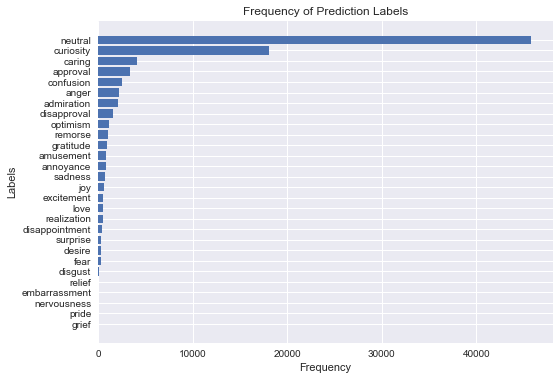

In [225]:
plt.barh(list(sorted_freq_dict.keys()), list(sorted_freq_dict.values()))
plt.title('Frequency of Prediction Labels')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('freq_preds.jpg')

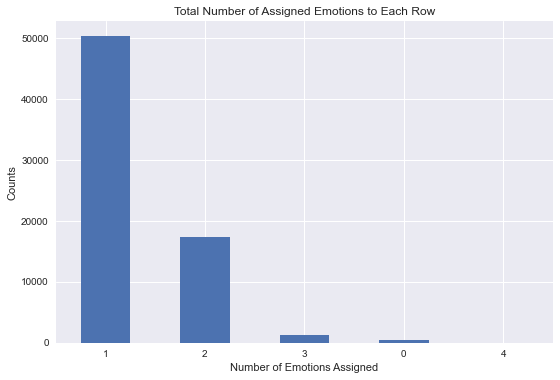

In [226]:
df.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=360)
plt.title('Total Number of Assigned Emotions to Each Row')
plt.xlabel('Number of Emotions Assigned')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('total_preds.jpg')

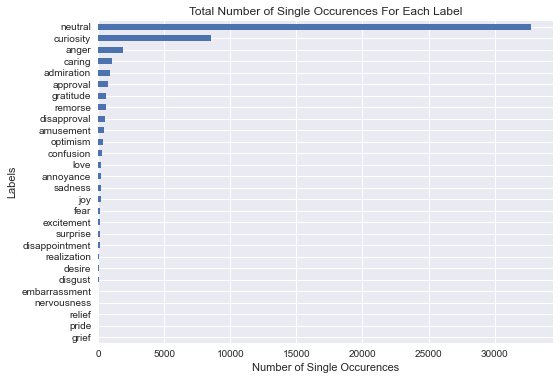

In [227]:
df[(df>0).sum(axis=1) == 1].astype(bool).sum(axis=0).sort_values(ascending=True).plot.barh()
plt.title('Total Number of Single Occurences For Each Label')
plt.xlabel('Number of Single Occurences')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('occurs_preds.jpg')

In [235]:
# Fixing the mean graph to include only instances that were labeled with each emotion
labels = df.columns
mean_scores = []
for label in labels:
    mean_scores.append(df.loc[df[label] > 0, label].mean())

In [236]:
mean_scores

[0.8330459217002762,
 0.874408507879031,
 0.6695556368249673,
 0.6775242376464362,
 0.746370284879165,
 0.6920038531890454,
 0.5944458490294666,
 0.8000474572773997,
 0.6896443549069491,
 0.6635243833334737,
 0.7650727009487585,
 0.7044460941659342,
 0.6919222124691667,
 0.6278856016080314,
 0.7920469242113608,
 0.9223520946222337,
 nan,
 0.7052495555664465,
 0.8271335267017935,
 0.6225167300019946,
 0.7565028110657862,
 0.5828719735145569,
 0.6072920066142372,
 0.49125076109363186,
 0.789367324350722,
 0.6861939645017717,
 0.7331153271153429,
 0.8977900763609507]

In [239]:
# Sorting the frequencies in increasing order
mean_dict = dict(zip(labels, mean_scores))
del mean_dict['grief']
sorted_mean_dict = dict(sorted(mean_dict.items(), key=lambda item: item[1]))

In [240]:
sorted_mean_dict

{'relief': 0.49125076109363186,
 'pride': 0.5828719735145569,
 'confusion': 0.5944458490294666,
 'realization': 0.6072920066142372,
 'nervousness': 0.6225167300019946,
 'excitement': 0.6278856016080314,
 'disappointment': 0.6635243833334737,
 'anger': 0.6695556368249673,
 'annoyance': 0.6775242376464362,
 'sadness': 0.6861939645017717,
 'desire': 0.6896443549069491,
 'embarrassment': 0.6919222124691667,
 'caring': 0.6920038531890454,
 'disgust': 0.7044460941659342,
 'joy': 0.7052495555664465,
 'surprise': 0.7331153271153429,
 'approval': 0.746370284879165,
 'optimism': 0.7565028110657862,
 'disapproval': 0.7650727009487585,
 'remorse': 0.789367324350722,
 'fear': 0.7920469242113608,
 'curiosity': 0.8000474572773997,
 'love': 0.8271335267017935,
 'admiration': 0.8330459217002762,
 'amusement': 0.874408507879031,
 'neutral': 0.8977900763609507,
 'gratitude': 0.9223520946222337}

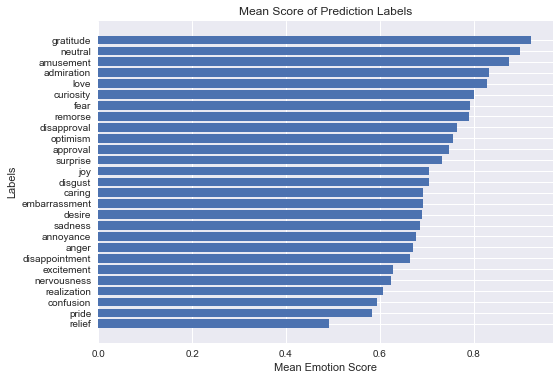

In [241]:
plt.barh(list(sorted_mean_dict.keys()), list(sorted_mean_dict.values()))
plt.title('Mean Score of Prediction Labels')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('mean_preds.jpg')

In [179]:
df_messages = pd.read_csv('../data/unique_messages.csv', index_col=0)

In [186]:
df_messages.iloc[112, 15]

'Lol never said anything about sex but ok'

In [181]:
df[df.anger > 0]

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
66,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
113,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
120,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
131,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
194,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153768,0.0,0.0,0.704199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153769,0.0,0.0,0.821945,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153839,0.0,0.0,0.986109,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153958,0.0,0.0,0.453907,0.323391,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807032
